In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import plotly.express as px

# DATA MINING

In [2]:
# import dataset 
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# DATA CLEANING

In [4]:
df.info()
# change all values in sqft_basement to numeric format
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')

#convert date to datetime
df.date = pd.to_datetime(df.date,format='%m/%d/%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Generate the first logical features before visual data exploration

In [5]:
#clean yr_renovated to contain no values smaller that build date by creating new column with date of last modernization
df['last_modernization'] = [renovated if renovated > built else built for idx, built, renovated in df[['yr_built', 'yr_renovated']].itertuples()]

# DATA EXPLORATION

/Users/leo/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_core.py:301: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



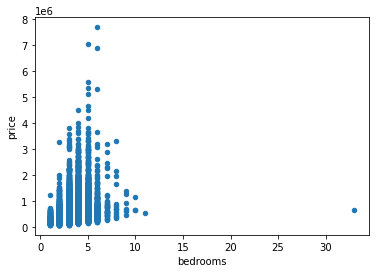

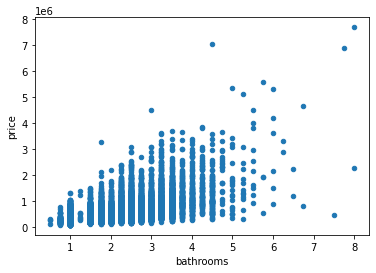

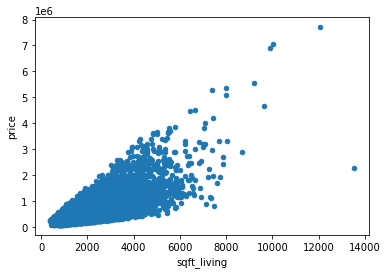

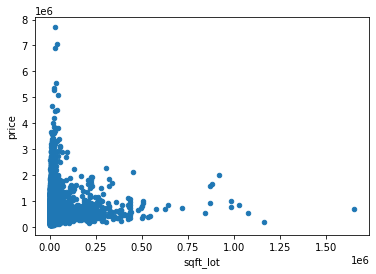

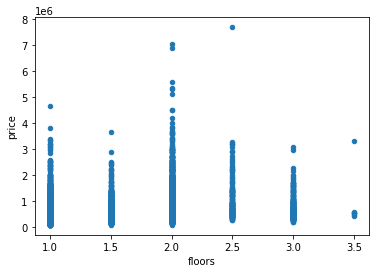

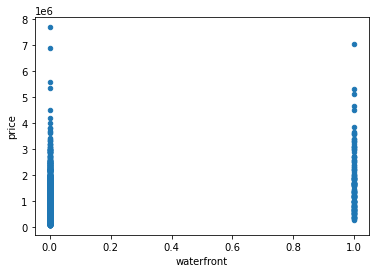

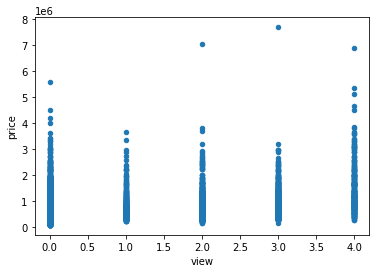

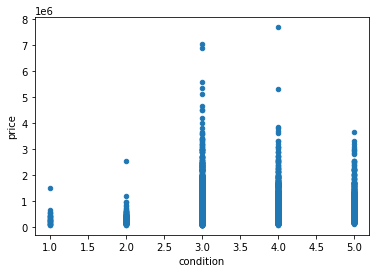

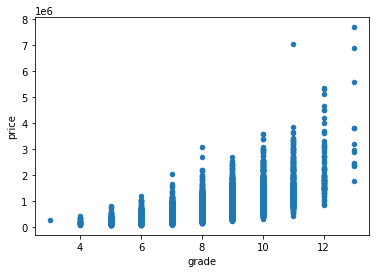

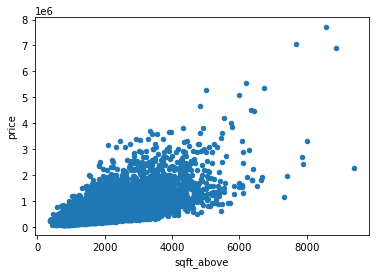

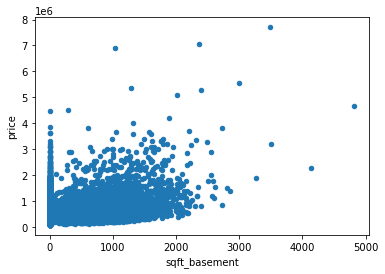

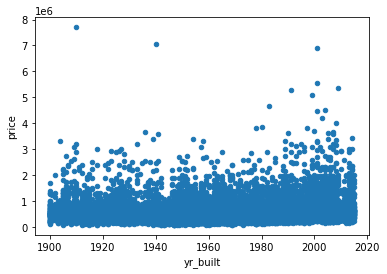

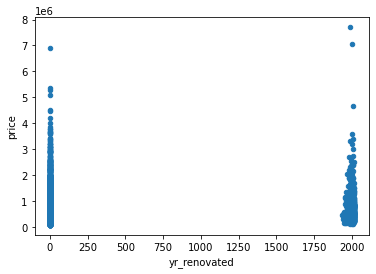

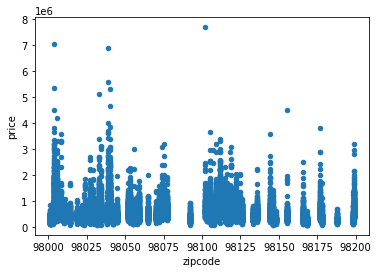

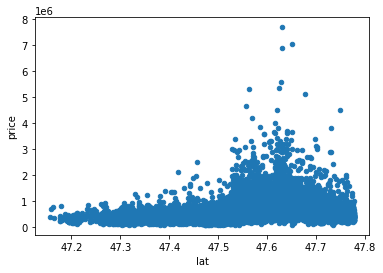

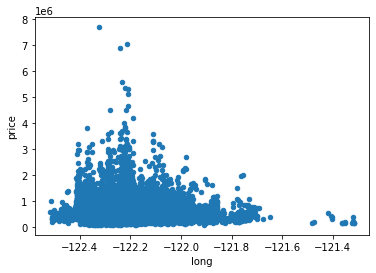

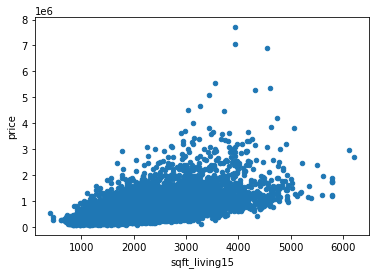

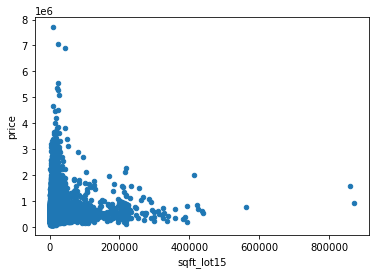

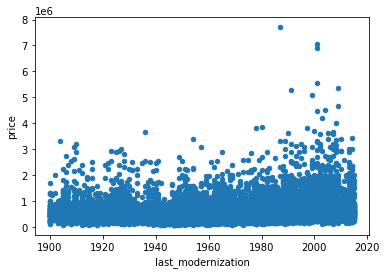

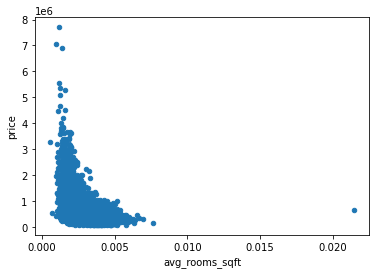

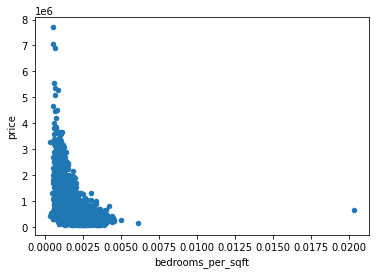

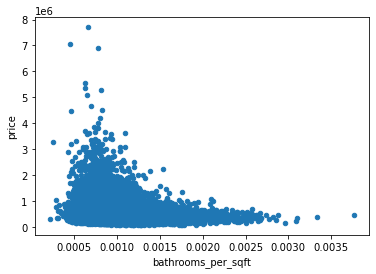

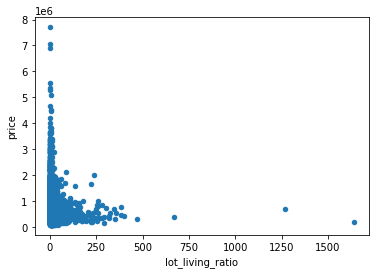

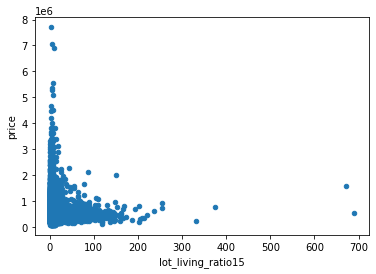

In [7]:
for feature in df.columns.drop(['id','price','date']):
    df.plot(x= feature, y = 'price',kind='scatter')

In [8]:
#someone has more than 30 bedrooms - can that be right?

#sqft_living seems to have strong positive relation

#condition seems to be rather binary with < 3 and > 3 category

#grade seems to have a positive relationship

#some specific zipcodes seem to have negative effect on price

#latitude around 47.6 seems to lead to higher prices

#longitude around -122 seems to lead to higher prices

#last modernization seems to only have small effect on prices

In [31]:
df['price_per_sqft_above'] = df.price / df.sqft_above
df.groupby('zipcode').median().sort_values(['zipcode','price_per_sqft_above'])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,last_modernization,avg_rooms_sqft,bedrooms_per_sqft,bathrooms_per_sqft,lot_living_ratio,lot_living_ratio15,price_per_sqft_above
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,3.751605e+09,260000.0,3.0,2.000,1824.0,9292.0,1.0,0.0,0.0,3.0,...,-122.2720,1700.0,8932.0,1983.0,0.003006,0.001863,0.001081,5.554913,5.407303,162.034483
98002,5.125400e+09,235000.0,3.0,1.750,1570.0,7282.0,1.0,0.0,0.0,4.0,...,-122.2150,1410.0,7316.0,1967.0,0.003247,0.002026,0.001101,4.878049,5.269159,160.000000
98003,4.322300e+09,267475.0,3.0,2.000,1780.0,8816.0,1.0,0.0,0.0,3.0,...,-122.3080,1774.0,8589.5,1975.5,0.002972,0.001809,0.001075,4.873026,5.053708,173.549927
98004,3.860400e+09,1150000.0,4.0,2.500,2660.0,11119.0,1.0,0.0,0.0,3.0,...,-122.2050,2540.0,11377.0,1969.0,0.002328,0.001408,0.000873,4.706690,4.674183,547.619048
98005,3.504980e+09,765475.0,4.0,2.375,2505.0,12220.0,1.0,0.0,0.0,4.0,...,-122.1685,2435.0,11623.5,1967.0,0.002474,0.001524,0.000910,5.740755,5.105270,371.934159
98006,4.139430e+09,760184.5,4.0,2.500,2720.0,10447.5,1.0,0.0,0.0,4.0,...,-122.1465,2690.0,10191.5,1979.0,0.002364,0.001417,0.000906,4.164783,4.006755,358.364871
98007,4.040400e+09,555000.0,4.0,2.250,2090.0,9000.0,1.0,0.0,0.0,4.0,...,-122.1420,2080.0,8749.0,1965.0,0.002880,0.001852,0.001009,4.390244,4.299571,332.592593
98008,4.038000e+09,545000.0,4.0,2.000,1980.0,8713.0,1.0,0.0,0.0,4.0,...,-122.1170,1930.0,8539.0,1965.0,0.002934,0.001905,0.001000,4.449153,4.637755,359.712230
98010,3.622069e+09,359999.5,3.0,2.000,1902.0,19727.0,1.5,0.0,0.0,3.0,...,-122.0030,1860.0,18963.0,1990.0,0.002632,0.001709,0.000955,10.597339,10.290761,202.040336


<AxesSubplot:xlabel='condition', ylabel='price_per_sqft_above'>

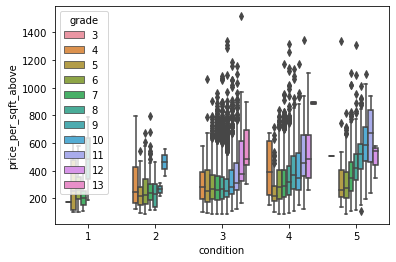

In [57]:
sns.boxplot(df.condition, df.price_per_sqft_above,hue = df.grade)

<AxesSubplot:xlabel='date', ylabel='price_per_sqft_above'>

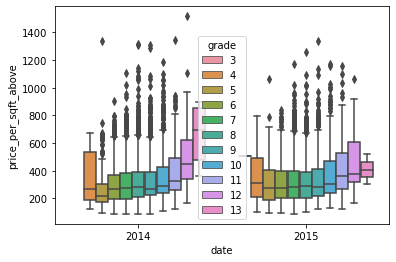

In [52]:
sns.boxplot(df.date.dt.year,df.price_per_sqft_above,hue = df.grade)

In [46]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'last_modernization',
       'avg_rooms_sqft', 'bedrooms_per_sqft', 'bathrooms_per_sqft',
       'lot_living_ratio', 'lot_living_ratio15', 'price_per_sqft_above'],
      dtype='object')

In [15]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'last_modernization',
       'avg_rooms_sqft', 'bedrooms_per_sqft', 'bathrooms_per_sqft',
       'lot_living_ratio', 'lot_living_ratio15'],
      dtype='object')

# FEATURE ENGINEERING

In [ ]:
#calculate how many squarefeet the rooms have on average
df['avg_rooms_sqft'] = (df.bedrooms + df.bathrooms) / df.sqft_living

#calculate how many bedrooms per squarefoot are there
df['bedrooms_per_sqft'] = df.bedrooms / df.sqft_living

#calculate how many bathroomy per squarefoot there are
df['bathrooms_per_sqft'] = df.bathrooms /df.sqft_living

#create lot to above ratio for individual home
df['lot_above_ratio'] = df.sqft_lot / df.sqft_above

#create lot to living ratio for individual home
df['lot_living_ratio'] = df.sqft_lot / df.sqft_living

#create lot to living ratio for nearest 15 neighbors
df['lot_living_ratio15'] = df.sqft_lot15 / df.sqft_living15A

# PREDICTIVE MODELING

# DATA VISUALIZATION